In [1]:
import torch

In [2]:
t1 = torch.tensor(4.)

In [3]:
t1 

tensor(4.)

In [4]:
# Vector
t2 = torch.tensor([1., 2, 3, 4])
t2


tensor([1., 2., 3., 4.])

In [5]:
# Matrix
t3 = torch.tensor([[5., 6], 
                   [7, 8], 
                   [9, 10]])
t3

tensor([[ 5.,  6.],
        [ 7.,  8.],
        [ 9., 10.]])

In [6]:
# 3-dimensional array
t4 = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
t4

tensor([[[11., 12., 13.],
         [13., 14., 15.]],

        [[15., 16., 17.],
         [17., 18., 19.]]])

In [7]:
print(t1.shape)

torch.Size([])


In [8]:
t2.shape

torch.Size([4])

In [9]:
t3.shape

torch.Size([3, 2])

In [10]:
t4.shape

torch.Size([2, 2, 3])

# Gradient

In [19]:
# Create tensors.
x = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]])
w = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]], requires_grad=True)
b = torch.tensor([
    [[11, 12, 13], 
     [13, 14, 15]], 
    [[15, 16, 17], 
     [17, 18, 19.]]], requires_grad=True)

In [20]:
y = w*x + b 

In [21]:
y 

tensor([[[132., 156., 182.],
         [182., 210., 240.]],

        [[240., 272., 306.],
         [306., 342., 380.]]], grad_fn=<AddBackward0>)

PyTorch special is that we can automatically compute the derivative of y w.r.t. the tensors that have requires_grad set to True i.e. w and b. To compute the derivatives, we can call the .backward method on our result y.

In [22]:
y.backward()

RuntimeError: grad can be implicitly created only for scalar outputs

In [15]:
print(f'dy/dx {x.grad}')

dy/dx None


In [16]:
print(f'dw/dx {w.grad}')
print(f'db/dx {b.grad}')

dw/dx 3.0
db/dx 1.0


# Interoprability with numpy

In [17]:
x = np.array([[1,2],[3,4]])
x 

<IPython.core.display.Javascript object>

array([[1, 2],
       [3, 4]])

In [18]:
y = torch.from_numpy(x)
y 

tensor([[1, 2],
        [3, 4]])

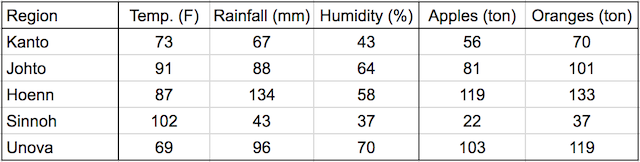

In [23]:
inputs = np.array([[73, 67, 43], 
                   [91, 88, 64], 
                   [87, 134, 58], 
                   [102, 43, 37], 
                   [69, 96, 70]], dtype='float32')

<IPython.core.display.Javascript object>

In [24]:
targets = np.array([[56, 70], 
                    [81, 101], 
                    [119, 133], 
                    [22, 37], 
                    [103, 119]], dtype='float32')

<IPython.core.display.Javascript object>

In [25]:
# Convert inputs and targets to tensors
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [26]:
# Weights and biases
w = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, requires_grad=True)
print(w)
print(b)

tensor([[-1.3748,  0.8369,  3.6994],
        [-0.6507,  0.0461,  1.2114]], requires_grad=True)
tensor([ 0.6602, -0.5127], requires_grad=True)


In [27]:
def model(x):
    return x @ w.t() + b 

@ represents matrix multiplication in PyTorch, and the .t method returns the transpose of a tensor.

The matrix obtained by passing the input data into the model is a set of predictions for the target variables.

In [28]:
# Generate predictions
preds = model(inputs)
print(preds)

tensor([[115.4492,   7.1686],
        [185.9661,  21.8650],
        [207.7671,  19.3220],
        [ 33.2975, -20.0784],
        [245.1035,  43.8186]], grad_fn=<AddBackward0>)


In [29]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [30]:
def mse(t1, t2):
    diff = t1 - t2
    return torch.sum(diff * diff) / diff.numel()

.numel is method to count number

In [31]:
loss = mse(preds,targets)
print(loss)

tensor(7479.5728, grad_fn=<DivBackward0>)


In [32]:
# compute gradient 

In [33]:
loss.backward()

In [34]:
w.grad

tensor([[ 6514.3857,  7848.5259,  4957.5776],
        [-6537.4961, -7215.6455, -4346.8633]])

In [36]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


In [37]:
for i in range(100):
    preds = model(inputs)
    loss = mse(preds, targets)
    loss.backward()
    with torch.no_grad():
        w -= w.grad * 1e-5
        b -= b.grad * 1e-5
        w.grad.zero_()
        b.grad.zero_()

In [39]:
preds = model(inputs)

In [40]:
loss = mse(preds, targets)

In [43]:
print(loss**0.5)

tensor(20.9208, grad_fn=<PowBackward0>)


In [44]:
print(preds)

tensor([[ 51.1015,  70.6055],
        [ 97.4187, 105.1921],
        [ 93.8468, 122.1960],
        [-12.8535,  39.6691],
        [148.3165, 125.3554]], grad_fn=<AddBackward0>)


# LR Using torch

In [45]:
import torch.nn as nn 

In [46]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58], 
                   [102, 43, 37], [69, 96, 70], [73, 67, 43], 
                   [91, 88, 64], [87, 134, 58], [102, 43, 37], 
                   [69, 96, 70], [73, 67, 43], [91, 88, 64], 
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]], 
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133], 
                    [22, 37], [103, 119], [56, 70], 
                    [81, 101], [119, 133], [22, 37], 
                    [103, 119], [56, 70], [81, 101], 
                    [119, 133], [22, 37], [103, 119]], 
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [48]:
from torch.utils.data import TensorDataset

In [50]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [51]:
from torch.utils.data import DataLoader

In [52]:
batch_size = 5
train_d1 = DataLoader(train_ds,batch_size,shuffle=True)

In [53]:
for xb,yb in train_d1:
    print(xb)
    print(yb)
    break

tensor([[ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [102.,  43.,  37.],
        [ 91.,  88.,  64.],
        [ 73.,  67.,  43.]])
tensor([[119., 133.],
        [ 81., 101.],
        [ 22.,  37.],
        [ 81., 101.],
        [ 56.,  70.]])


In [54]:
model = nn.Linear(3,2) #3 input and 2 output
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[-0.4064,  0.3983,  0.4596],
        [ 0.3611,  0.4366,  0.4934]], requires_grad=True)
Parameter containing:
tensor([ 0.4108, -0.0867], requires_grad=True)


In [56]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4064,  0.3983,  0.4596],
         [ 0.3611,  0.4366,  0.4934]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4108, -0.0867], requires_grad=True)]

In [57]:
preds = model(inputs)

In [58]:
preds 

tensor([[ 17.1931,  76.7384],
        [ 27.8938, 102.7669],
        [ 45.0853, 118.4457],
        [ -6.9101,  73.7713],
        [ 42.7788, 101.2762],
        [ 17.1931,  76.7384],
        [ 27.8938, 102.7669],
        [ 45.0853, 118.4457],
        [ -6.9101,  73.7713],
        [ 42.7788, 101.2762],
        [ 17.1931,  76.7384],
        [ 27.8938, 102.7669],
        [ 45.0853, 118.4457],
        [ -6.9101,  73.7713],
        [ 42.7788, 101.2762]], grad_fn=<AddmmBackward>)

## LOSS FUNCTion

In [59]:
import torch.nn.functional as F 

In [62]:
loss_fn = F.mse_loss

In [60]:
?nn.Linear

In [63]:
loss= loss_fn(model(inputs),targets)

In [64]:
print(loss)

tensor(1617.8617, grad_fn=<MseLossBackward>)


## Optimizer

In [65]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [66]:
opt 

SGD (
Parameter Group 0
    dampening: 0
    lr: 1e-05
    momentum: 0
    nesterov: False
    weight_decay: 0
)

In [71]:
# Utility function to train the model
def fit(num_epochs, model, loss_fn, opt):
    
    # Repeat for given number of epochs
    for epoch in range(num_epochs):
        
        # Train with batches of data
        for xb,yb in train_d1:
            
            # 1. Generate predictions
            pred = model(xb)
            
            # 2. Calculate loss
            loss = loss_fn(pred, yb)
            
            # 3. Compute gradients
            loss.backward()
            
            # 4. Update parameters using gradients
            opt.step()
            
            # 5. Reset the gradients to zero
            opt.zero_grad()
        
        # Print the progress
        if (epoch+1) % 10 == 0:
            print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [72]:
fit(100,model,loss_fn,opt)

Epoch [10/100], Loss: 55.4421
Epoch [20/100], Loss: 92.6567
Epoch [30/100], Loss: 16.0672
Epoch [40/100], Loss: 53.1800
Epoch [50/100], Loss: 62.6096
Epoch [60/100], Loss: 21.1011
Epoch [70/100], Loss: 20.2817
Epoch [80/100], Loss: 15.0488
Epoch [90/100], Loss: 7.7657
Epoch [100/100], Loss: 12.9974
